# Pandas For Working With Tabular Data

[Pandas](http://pandas.pydata.org/) is a library designed to work with tabular data. It is built on NumPy. Data in pandas is often used to plot with Matplotlib or feed statistical analysis with Seaborn. Its ease of use makes it ideal to work with large data sets.

## <span style="color:blue">DataFrames have a size and shape</span> ##
---

Pandas __Series__ are a one-dimensional labeled array holding data of any type.

Pandas __DataFrames__ are structures that contain data organized in two dimensions, _i.e._ __rows__ and __columns__. Both rows and columns have __indices__. Columns can have __labels__ too. 

DataFrames have a variety of properties:

- __size__: the total number of elements
- __shape__: the number of units along each dimension

```{image} ./Images-PandasForTabularData/Dataframes.png
:alt: A DataFrame has rows and columns
:width: 600px
:align: center
```

Of note, NumPy arrays and pandas Series have one data type for the entire array or Series while pandas DataFrames have one data type per column. Missing data is shown as `NaN`.

## <span style="color:blue">Creating a DataFrame from an Excel file</span> ##
---

We can read in data from __an Excel file__ into Python using pandas with `pd.read_excel(file_name)`. Do not forget to include the file path _(not needed if the file is saved in the directory from which we are running the script!)_ and extension.

This function has several arguments. Here, we list commonly used ones:
- To read in data from a specific sheet, use the argument `sheet_name`. _Sheet numbers start with zero!_ By default, this is set to `0` and the first sheet is used.
- To skip rows at the beginning and end when reading an Excel sheet, use the arguments `skiprows` and `skipfooter`. By default, both are set to `0` and no rows at the beginning and end are skipped.
- To only read certain columns when importing an Excel sheet, use the argument `usecols`. _Column numbers start with zero!_ By default, this is set `None` and all columns are parsed.
- To specify a specific row as column labels, use the argument `header`. By default, this is set to `0` and the first row of the Excel file (with index 0) is used as column labels.
- To label columns when importing an Excel sheet without column names, use the arguments `header=None` and `names=['column_name 1', ... ,'column_name_n']`. To relabel columns when importing an Excel sheet that already contains column names in the first row, use the arguments `header=None`, `skiprows=1`, and `names=['column_name_1', ... ,'column_name_n']`.

## <span style="color:blue">Indexing and slicing for DataFrames</span> ##
---

We can select rows, columns, and positions in a DataFrame using `dataframe_name.iloc[]`. There are two arguments: a row selector, and an optional column selector: `dataframe_name.iloc[row_index, column_index]`. Both accept the zero-based indices of rows and columns.

To select an entire row, simply specify the index of the row, _e.g._ `dataframe_name.iloc[0]` to access row 0.

To select an entire column, specify the index of the column and provide `:` for the row index, _e.g._ `dataframe_name.iloc[:,0]` to access column 0. Instead of using the `.iloc` method to extract a column, we can also use square brackets with the column name of interest. For example, both `dataframe_name.iloc[:,0]` and `dataframe_name['column_name_1']` give the first column of the DataFrame.

We can also use a range for the row index and/or column index to slice multiple elements using: `dataframe_name.iloc[start_index_row:end_index_row, start_index_column:end_index_column]`. We select data from position `start_index` (included) to position `end_index` (excluded).

## <span style="color:blue">Example</span> ##
---

Please pay attention to the use of comments (with `#`) to express the units of variables or to describe the meaning of commands.

```{Admonition} Example
:class: note
You measured the BSA standards for a colorimetric assay in duplicate. You collected your data in an Excel file called “StandardCurve.xlsx”. Read in this data file with pandas and plot the data with matplotlib.

Download the Excel file [here](https://github.com/renee-85/PythonForBiochemists/tree/master/data).
```

In [7]:
#import the library needed (i.e. pandas) and introduce convenient naming
import pandas as pd

dfStandardCurve = pd.read_excel ('../data/StandardCurve.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                    sheet_name=0,   #use the first sheet (no need to specifically include this as we use the default setting)
                    skiprows=0,   #skip no rows (no need to specifically include this as we use the default setting)
                    usecols=None,   #import all columns (no need to specifically include this as we use the default setting)
                    header=0,   #use the column names from the now first row as column labels (no need to specifically include this as we use the default setting)
                    skipfooter=0)   #skip no footers (no need to specifically include this as we use the default setting)

print(dfStandardCurve)   #print the DataFrame created

   [BSA] (mg/ml)  A562nm (AU) - 1  A562nm (AU) - 2
0          2.000            1.405            1.240
1          1.500            1.125            0.974
2          1.000            0.844            0.686
3          0.750            0.705            0.560
4          0.500            0.539            0.436
5          0.250            0.311            0.278
6          0.125            0.209            0.188
7          0.000            0.100            0.095


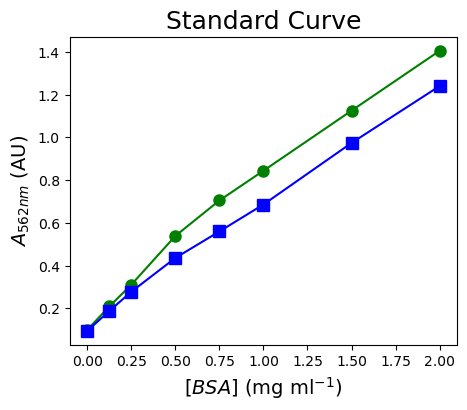

In [8]:
#import the library needed (i.e. pandas) and introduce convenient naming
import matplotlib.pyplot as plt

#Plot the data
plt.figure(figsize=(5,4))   #start a figure object

plt.plot(dfStandardCurve['[BSA] (mg/ml)'], dfStandardCurve['A562nm (AU) - 1'],   #plot a set of x (= the BSA concentrations) ,y (=the measured absorbances) data
         marker='o', color='green', markersize=8)   #use a round, green marker with size 8

plt.plot(dfStandardCurve['[BSA] (mg/ml)'], dfStandardCurve['A562nm (AU) - 2'],   #plot a set of x (= the same BSA concentrations) ,y (=the measured absorbances) data, a duplicate experiment
         marker='s', color='blue', markersize=8)   #use a square, blue marker with size 8

plt.title('Standard Curve', fontsize=18)   #define the graph title
plt.xlabel('$[BSA]$ (mg ml$^{-1}$)', fontsize=14)   #define the X-axis label
plt.ylabel('$A_{562nm}$ (AU)', fontsize=14)   #define the Y-axis label

plt.show()   #show the figure object

## <span style="color:blue">Exercise</span> ##
---

```{admonition} Exercise
You measured absorbance versus time for an enzyme reaction. You collected your data in an Excel file called “EnzymeKinetics.xlsx”. Read in this data file with pandas and plot the data with matplotlib.

Download the Excel file [here](https://github.com/renee-85/PythonForBiochemists/tree/master/data).
```

````{admonition} Solution
:class: dropdown

Here's one possible solution.

```{code-block} python
#import the library needed (i.e. pandas) and introduce convenient naming
import pandas as pd

dfEnzymeKinetics = pd.read_excel ('../data/EnzymeKinetics.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                    sheet_name=0,   #use the first sheet (no need to specifically include this as we use the default setting)
                    skiprows=0,   #skip no rows (no need to specifically include this as we use the default setting)
                    usecols=None,   #import all columns (no need to specifically include this as we use the default setting)
                    header=0,   #use the column names from the now first row as column labels (no need to specifically include this as we use the default setting)
                    skipfooter=0)   #skip no footers (no need to specifically include this as we use the default setting)

print(dfEnzymeKinetics)   #print the DataFrame created
```

```{code-block} python
#import the library needed (i.e. pandas) and introduce convenient naming
import matplotlib.pyplot as plt

#Plot the data
plt.figure(figsize=(5,4))   #start a figure object

plt.plot(dfEnzymeKinetics['Time (s)'], dfEnzymeKinetics['A450nm (AU)'],   #plot a set of x (= time points) ,y (=the measured absorbances) data
         marker='o', color='black', markersize=8)   #use a round, black marker with size 8

plt.title('Progress curve', fontsize=18)   #define the graph title
plt.xlabel('$Time$ (s)', fontsize=14)   #define the X-axis label
plt.ylabel('$A_{450nm}$ (AU)', fontsize=14)   #define the Y-axis label

plt.show()   #show the figure object
```
````